# link to source code

http://localhost:8948/lab/tree/Desktop/juliafairbank7.github.io/posts/logistic-regression-post/LogisticRegression.py

# fit()

LogisticRegression.fit(X, y) is the primary method. When LR.fit(X, y) is called, LR should have an instance variable of weights called w, which is a vector of weights, including the bias term. LR should have an instance variable called LR.loss_history which is a list of the evolution of the loss over the training period, and an instance variable called LR.score_history, which is a list of the evolution of the score over the training period.

In [13]:
def fit(self, X, y, alpha=0.1, max_epochs=1000):
    #preprocess X by padding with 1s
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
    #initialize random w vector
    self.w_hat = np.random.rand(X_hat.shape[1]) 
        
    # list of the evolution of the score over the training period
    self.score_history = []
    self.loss_history = []

        
    n = X.shape[0]
        
    # compute complete gradient
    for _ in range(max_epochs):
            
        i = np.random.randint(0, n)
            
        #update
        self.w_hat = (
            self.w_hat 
            - alpha 
            * self.gradient(X, y)
        )
            
        self.score_history.append(self.score(X, y))
        self.loss_history.append(self.empirical_risk(X, y))

# fit_stochastic()

LogisticRegression.fit_stochastic(X, y) is an alternative version of the fit() method which computes a stochastic gradient by picking a random subset, computing the stochastic gradient, performing an update, then repeating. When LR.fit_stochastic(X, y) is called, LR should have an instance variable of weights called w, which is a vector of weights, including the bias term b. LR should have an instance variable called LR.loss_history which is a list of the evolution of the loss over the training period, and an instance variable called LR.score_history, which is a list of the evolution of the score over the training period.

In [14]:
def fit_stochastic(self, X, y, m_epochs=1000, momentum = False, batch_size = 10, alpha = .1):
        #preprocess X by padding with 1s
        X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
        #initialize random w vector
        self.w_hat = np.random.rand(X_hat.shape[1]) 
        
        # list of the evolution of the score over the training period
        self.score_history = []
        self.loss_history = []
        
        n = X.shape[0]
            
        for j in np.arange(m_epochs):
            order = np.arange(n)
            np.random.shuffle(order)

            for batch in np.array_split(order, n // batch_size + 1):
                x_batch = X[batch,:]
                y_batch = y[batch]
                grad = self.gradient(x_batch, y_batch) 
                
                #update
                self.w_hat = (
                self.w_hat 
                - alpha 
                * grad
                )
                
            self.score_history.append(self.score(X, y))
            self.loss_history.append(self.empirical_risk(X, y))

# predict()

LogisticRegression.predict(X) should return a vector of predicted labels, which are the model’s predictions for the labels on the data.

In [15]:
def predict(self, X):
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)            
    return X_hat@self.w_hat

# score()

LogisticRegression.score(X, y) should return the accuracy of the predictions as a number between 0 and 1, with 1 corresponding to perfect classification.

In [16]:
def score(self, X, y):
        #preprocess X by padding with 1s
        X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
        predictions = self.predict(X)
        
        accuracy = predictions == y 
        
        accuracy = accuracy * 1
        
        accuracy = accuracy.mean()
        
        return accuracy

# gradient()

LogisticRegression.gradient(X, y) calculates the gradient of the loss function with respect to an instance variable of weights called w. 


In [17]:
def gradient(self, X, y):
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
    sum_i = 0;
    n = X_hat.shape[0]
        
    for i in range(n):
        sum_i += (self.sigmoid(
            np.dot(self.w_hat, X_hat[i])
        )
            - y[i]
        ) * X_hat[i]
        
    grad = 1/n * sum_i
        
    return grad

# logistic_loss()

LogisticRegression.logistic_loss() calculates the logistic loss using the logistic sigmoid function.

In [7]:
def logistic_loss(self, y_hat, y): 
        return -y*np.log(self.sigmoid(y_hat)) - (1-y)*np.log(1-self.sigmoid(y_hat))

# empirical_risk()

LogisticRegression.empirical_risk(X, y, loss, w) calculates the empirical risk using the predict() function. 

In [18]:
def empirical_risk(self, X, y,):
        y_hat = self.predict(X)
        return self.logistic_loss(y_hat, y).mean()

# data set

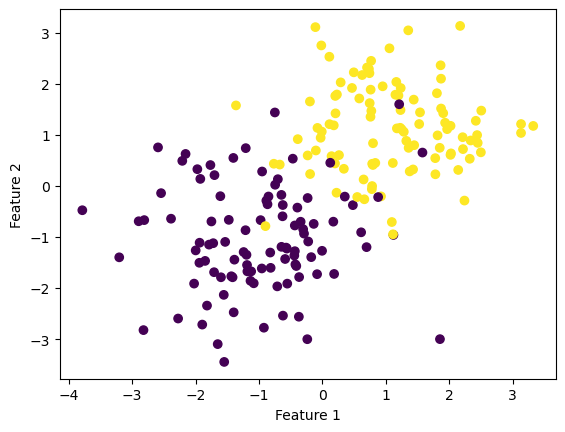

In [20]:
from LogisticRegression import LogisticRegression # your source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

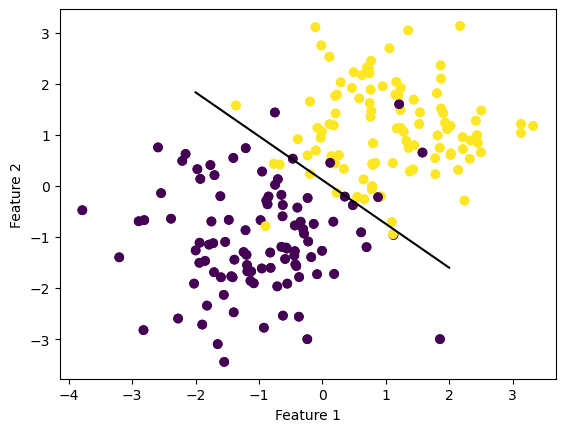

In [21]:
# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

# inspect the fitted value of w
#LR.w 

fig = plt.scatter(X[:,0], X[:,1], c = y)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


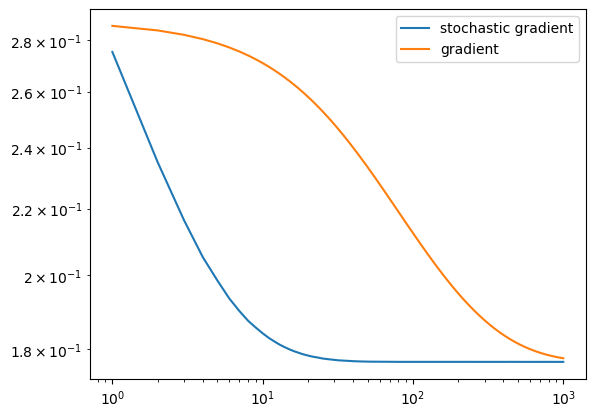

In [22]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")


LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

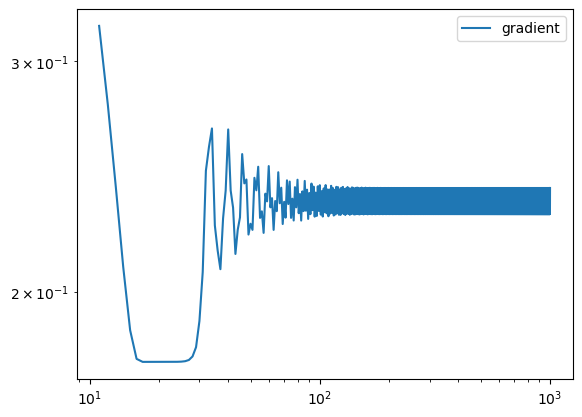

In [23]:
LR = LogisticRegression()
LR.fit(X, y, alpha = 50, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 